They're alive! Monsters can move. They're, not smart, but they should be able to catch a wandering hero more often, just from covering more tiles.

In [1]:
import matplotlib.pyplot as plt
from treasure_hunt.environment import BaseTreasureHuntEnv as Environment
from treasure_hunt.agent import SimplifierQLearner
from gymnasium.wrappers import TimeLimit

from treasure_hunt.agent.env_reducer import NearSightedReducer

from treasure_hunt.environment.monster_strategy import RandomMovementStrategy

from treasure_hunt.utils import AdaptiveRLRunner, run_with_render

In [2]:
# Initialize environment and agent
env = TimeLimit(Environment(monster_strategy=RandomMovementStrategy()), 500) # Truncate at 500 steps
agent = SimplifierQLearner(env, NearSightedReducer(env.unwrapped), exploration_decay=.999)

In [3]:
agent.min_exploration_rate=.1

In [4]:
# Setup runner
runner = AdaptiveRLRunner(agent=agent, env=env, total_epochs=1000, target_std_ratio=.5)

In [5]:
# Train the agent
runner.train_agent()

Epoch 1/1000 - Training complete
Epoch 1/1000 - Mean reward: -910.4
Epoch 2/1000 - Training complete
Epoch 2/1000 - Mean reward: -508.6
Epoch 3/1000 - Training complete
Epoch 3/1000 - Mean reward: -411.2
Epoch 4/1000 - Training complete
Epoch 4/1000 - Mean reward: -134.8
Epoch 5/1000 - Training complete
Epoch 5/1000 - Mean reward: -129.2
Epoch 6/1000 - Training complete
Epoch 6/1000 - Mean reward: -297.6
Epoch 7/1000 - Training complete
Epoch 7/1000 - Mean reward: -202.8
Epoch 8/1000 - Training complete
Epoch 8/1000 - Mean reward: -173.2
Epoch 9/1000 - Training complete
Epoch 9/1000 - Mean reward: -165.8
Epoch 10/1000 - Training complete
Adapted evaluation episodes to 6 based on std ratio 3.8182646907414277
Epoch 10/1000 - Mean reward: -145.2
Epoch 11/1000 - Training complete
Adapted evaluation episodes to 7 based on std ratio 2.886976910736012
Epoch 11/1000 - Mean reward: -121.33333333333333
Epoch 12/1000 - Training complete
Adapted evaluation episodes to 8 based on std ratio 1.103994

/media/khaur/DATA/Workspaces/rl-treasure/treasure_hunt/utils.py:130: RuntimeWarning: divide by zero encountered in scalar divide
  std_ratio = std_inter / std_inner


Epoch 728/1000 - Training complete
Adapted evaluation episodes to 5 based on std ratio 0.5073721655648883
Epoch 728/1000 - Mean reward: 48.25
Epoch 729/1000 - Training complete
Adapted evaluation episodes to 6 based on std ratio 0.5156987859740929
Epoch 729/1000 - Mean reward: 77.0
Epoch 730/1000 - Training complete
Adapted evaluation episodes to 7 based on std ratio 0.7948206014485092
Epoch 730/1000 - Mean reward: 141.83333333333334
Epoch 731/1000 - Training complete
Adapted evaluation episodes to 8 based on std ratio 0.5586030570531799
Epoch 731/1000 - Mean reward: 74.28571428571429
Epoch 732/1000 - Training complete
Adapted evaluation episodes to 9 based on std ratio 0.6292515939631864
Epoch 732/1000 - Mean reward: 114.25
Epoch 733/1000 - Training complete
Adapted evaluation episodes to 10 based on std ratio 0.5703179447716973
Epoch 733/1000 - Mean reward: 97.55555555555556
Epoch 734/1000 - Training complete
Adapted evaluation episodes to 10 based on std ratio 0.4923269798603973
Epo

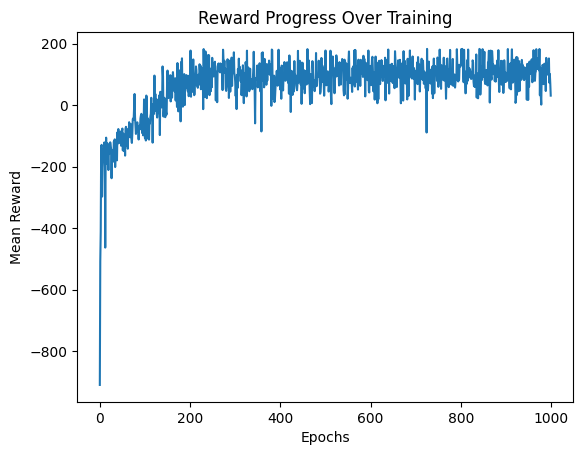

In [6]:
runner.plot_results()

In [11]:
# Evaluate the agent
runner.test_agent(final_test=True)
print(f"Mean Reward after training: {runner.reward_history[-1]}")

Mean Reward after training: 89.5


In [12]:
import os
import pickle
from datetime import datetime

runner.save_results()

Results saved to the 'results/qlearner-static/20241227_153438' folder.


In [13]:
# Initialize the environment with 'human' render mode
env_human = Environment(monster_strategy=RandomMovementStrategy(),render_mode="human")

run_with_render(env_human, agent, n_episodes=10)

# Close the environment
env_human.close()

In [11]:
# Extra close in case the cell above crashes
env_human.close()